# Exploratory Data Analysis
## Haberman's Data set

Contains details of cancer survival rates

In [2]:
#Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels import robust

In [3]:
#Read the data set
df = pd.read_csv('haberman.csv', names = ['Age','Op_Year','axil_nodes','Surv_status'])
df

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [4]:
df.shape

(306, 4)

In [5]:
#Find out survival status counts
df['Surv_status'].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

In [6]:
#Research and understanding on the features of the data set
print(df.columns)

#To find the range of years for data set
print('Operation years range: {0} - {1}'.format(df['Op_Year'].min(),df['Op_Year'].max()))

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')
Operation years range: 58 - 69


Data set contains information on patients who have undergone surgery for breast cancer
Understanding of above columns:
1. Age: Age of the patient as of surgery
2. Op_Year: Year of operation (Between 1958-1970 as per kaggle description, but 1958-1970 as per data range)
3. axil_nodes: Number of positive axilliary lymph nodes detected during surgery
4. Surv_status: Survival status of the patient (1 = Patient survived >= 5 years; 2 = Patient died < 5 years)

Sources:
1. https://www.kaggle.com/gilsousa/habermans-survival-data-set
2. https://www.medicalnewstoday.com/articles/319713.php

### Objective: Perform EDA to understand the survival status (Class label) of a patent given Age, Op_Year and axil_nodes

### Univariate analysis

#### Distance plots

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


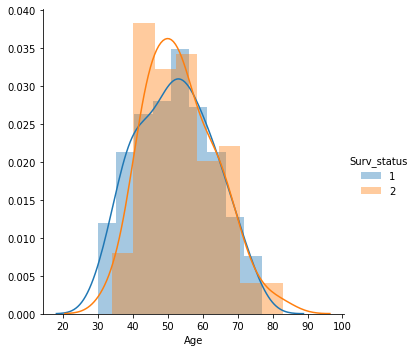

In [7]:
#Distance plot for age relationship with survival status
sns.FacetGrid(df, hue = 'Surv_status', size = 5).map(sns.distplot, 'Age').add_legend()
plt.show()

Ages 30-33 have an assured survival rate of 5+ years while ages 78-83 do not survive beyond 5 years
Too much overlap to extract further information from Age on survival rate

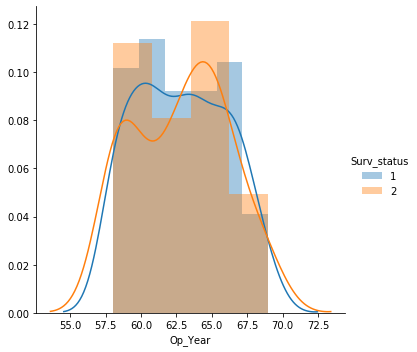

In [8]:
#Distance plot to show relation of operation year with survival status
sns.FacetGrid(df, hue = 'Surv_status', size = 5).map(sns.distplot, 'Op_Year').add_legend()
plt.show()

Survival status seems to not have much relation with the operation year as overlap is throughout the range of years
Hence, no assumptions can be made on the impact of improving surgery technology towards the survival rate of a patient

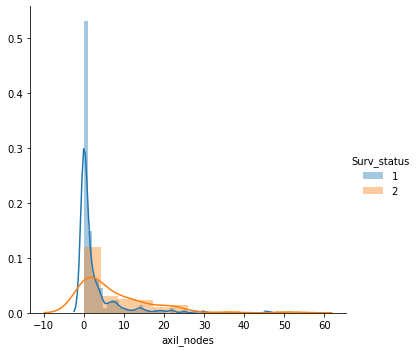

In [9]:
#Distance plot to show relation between number of axil nodes and survival status
sns.FacetGrid(df, hue = 'Surv_status', size = 5).map(sns.distplot, 'axil_nodes').add_legend()
plt.show()

For fewer number of nodes (0-4), there is a far higher (30% - 15%) chance of the patient surviving beyond 5 years, while as the number of axil nodes increases beyond 5 and upto 25, the patient ranges between 4% - 2% chances of surviving below 5 years, and the chances of surviving beyond 5 years is less than 2%

#### PDF and CDF

In [10]:
#Distribute the data frame based on survival status
df_1 = df.loc[df['Surv_status'] == 1]
df_2 = df.loc[df['Surv_status'] == 2]

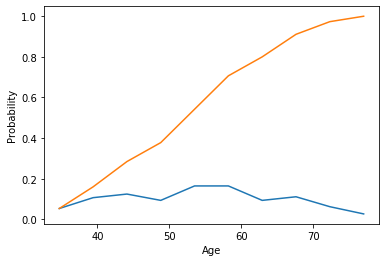

In [11]:
#PDF and CDF for age of patients with survival status 1
counts, bin_edges = np.histogram(df_1['Age'], bins = 10, density = True)
pdf = counts / (sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('Age')
plt.ylabel('Probability')
plt.show()

As per cumulative distribution function (CDF), 75% of patients below age 60 have a survival status below 5 years

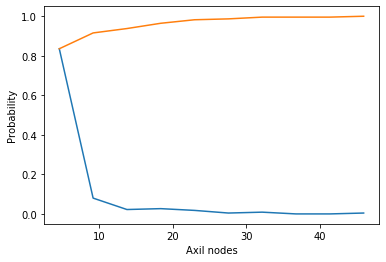

In [12]:
#PDF and CDF for axil nodes of patients with survival status 1
counts, bin_edges = np.histogram(df_1['axil_nodes'], bins = 10, density = True)
pdf = counts / (sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('Axil nodes')
plt.ylabel('Probability')
plt.show()

If no axil nodes, the chances of a patient surviving >5 years is 83% and this drops drastically to 10% with 8 nodes
From CDF, we understand that there is a 95% chance of survival status 1 for patients having <= 10 axil nodes

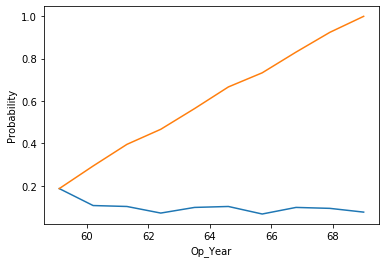

In [13]:
#PDF and CDF to show relation of year of surgery with survival status 1
counts, bin_edges = np.histogram(df_1['Op_Year'],bins = 10,density = True)
pdf = counts / (sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('Op_Year')
plt.ylabel('Probability')
plt.show()

Survival status 1 (>5 years) is noticed to be the highest (20%) in the 1958. It has a gradual drop and rise over the years with no significant change in the probability rates

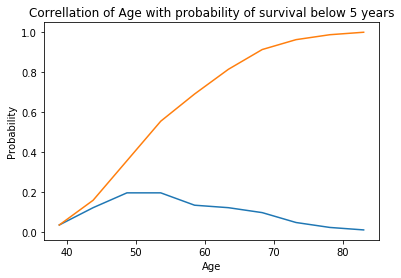

In [14]:
#PDF and CDF to show relation of Age with survival status 2
counts, bin_edges = np.histogram(df_2['Age'], bins = 10, density = True)
pdf = counts / (sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('Correllation of Age with probability of survival below 5 years')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.show()

Maximum chances of survival below 5 years is for patients in the age of 50-55 years with a survival rate of around 20%
90% of patients within 70 years survive below 5 years

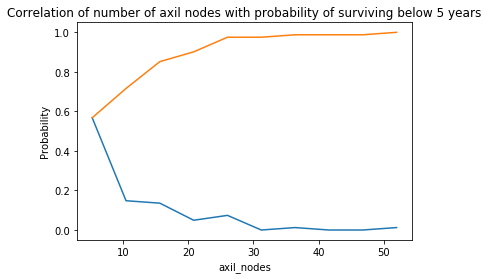

In [15]:
#PDF and CDF to show relation of number of axil nodes with survival rate of patient
counts, bin_edges = np.histogram(df_2['axil_nodes'], bins = 10, density = True)
pdf = counts / (sum(counts))
cdf = np.cumsum(pdf)
plt.title('Correlation of number of axil nodes with probability of surviving below 5 years')
plt.xlabel('axil_nodes')
plt.ylabel('Probability')
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

Fewer the number of axil nodes, greater the chances of survival beyond 5 years
From 0-10 nodes, probability ranges between 55%-17% with a minimum of <5% survival when number of nodes are more than 32
95% chances of survival beyond 5 years if fewer than 28 nodes are detected

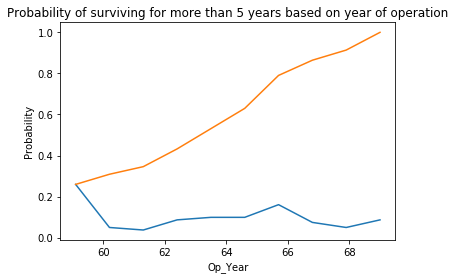

In [16]:
#PDF and CDF to show relation of operation year with survival status 2
counts, bin_edges = np.histogram(df_2['Op_Year'], bins = 10, density = True)
pdf = counts / (sum(counts))
cdf = np.cumsum(pdf)
plt.title('Probability of surviving for more than 5 years based on year of operation')
plt.xlabel('Op_Year')
plt.ylabel('Probability')
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

Probability of survival below 5 years is high during the years 1958-59 (25%-18%) and shows a significant spike betwen 1965-66 (18%) which might indicate an improvement in the surgery in some way (new tech, fewer cases, etc)

#### Mean, variance and standard deviation

In [17]:
#Find mean and related values to understand how widely distributed the data is
for col in df_1.columns:
    print('Feature: {}'.format(col))
    print('Mean: {}'.format(np.mean(df_1[col])))
    print('Variance: {}'.format(np.var(df_1[col])))
    print('Std Deviation: {}\n'.format(np.std(df_1[col])))

Feature: Age
Mean: 52.01777777777778
Variance: 120.72857283950617
Std Deviation: 10.987655475100508

Feature: Op_Year
Mean: 62.86222222222222
Variance: 10.341017283950617
Std Deviation: 3.2157452144021947

Feature: axil_nodes
Mean: 2.7911111111111113
Variance: 34.30747654320988
Std Deviation: 5.857258449412138

Feature: Surv_status
Mean: 1.0
Variance: 0.0
Std Deviation: 0.0



High variance in age shows a broad range of patients having cancer
<br>Distribution is also more in terms of number of axil nodes as per the value obtained

In [26]:
#Mean for survival status 2 (<5 years)
for col in df_2.columns:
    print('Feature: {}'.format(col))
    print('Mean: {}'.format(np.mean(df_2[col])))
    print('Variance: {}'.format(np.var(df_2[col])))
    print('Std Deviation: {}\n'.format(np.std(df_2[col])))

Feature: Age
Mean: 53.67901234567901
Variance: 102.09449778997104
Std Deviation: 10.104182193031312

Feature: Op_Year
Mean: 62.82716049382716
Variance: 11.03185490016766
Std Deviation: 3.3214236255207887

Feature: axil_nodes
Mean: 7.45679012345679
Variance: 83.33455265965554
Std Deviation: 9.128776076761635

Feature: Surv_status
Mean: 2.0
Variance: 0.0
Std Deviation: 0.0



It is observed that when the number of axil nodes averages around 7, the survival rate falls below 5 years<br>
Whereas, when it averages around 2, survival rate is higher than 5 years<br>
Also noticed is that the mean for the other 2 features remains the same so axil nodes can be a differentiating factor

#### Median, MAD and Quartiles

In [27]:
#Median for the same data sets to see how it is affected by outliers
for col in df_1.columns:
    print('Feature: {}'.format(col))
    print('Median: {}'.format(np.median(df_1[col])))
    print('Median Absolute Deviation: {}'.format(robust.mad(df_1[col])))
    print('Quantiles: {}\n'.format(np.percentile(df_1[col],np.arange(25,125,25))))

Feature: Age
Median: 52.0
Median Absolute Deviation: 13.343419966550417
Quantiles: [43. 52. 60. 77.]

Feature: Op_Year
Median: 63.0
Median Absolute Deviation: 4.447806655516806
Quantiles: [60. 63. 66. 69.]

Feature: axil_nodes
Median: 0.0
Median Absolute Deviation: 0.0
Quantiles: [ 0.  0.  3. 46.]

Feature: Surv_status
Median: 1.0
Median Absolute Deviation: 0.0
Quantiles: [1. 1. 1. 1.]



Median for axil nodes indicates that up to 75% of patients have <3 axil nodes and these patients survive beyond 5 years

In [30]:
#Median of features for patients surviving <5 years to compare with mean
for col in df_2.columns:
    print('Feature: {}'.format(col))
    print('Median: {}'.format(np.median(df_2[col])))
    print('Median absolute deviation: {}'.format(robust.mad(df_2[col])))
    print('Quartiles: {}\n'.format(np.percentile(df_2[col],np.arange(25,125,25))))

Feature: Age
Median: 53.0
Median absolute deviation: 11.860817748044816
Quartiles: [46. 53. 61. 83.]

Feature: Op_Year
Median: 63.0
Median absolute deviation: 4.447806655516806
Quartiles: [59. 63. 65. 69.]

Feature: axil_nodes
Median: 4.0
Median absolute deviation: 5.930408874022408
Quartiles: [ 1.  4. 11. 52.]

Feature: Surv_status
Median: 2.0
Median absolute deviation: 0.0
Quartiles: [2. 2. 2. 2.]

